# Introduction

In [1]:
%run "00_utils.ipynb"

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import gridspec


%matplotlib inline

### Datasets & Simulations
- Scklearn toy-datasets vs real world Vs `make_xxx` e.g. make_blob
- Create from equation
- Use distribution pdfs
- TODO: markov etc

In [3]:
from sklearn import datasets

In [4]:
dir(datasets.load_boston() )

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [5]:
# dset = datasets.load_boston()
# df = pd.DataFrame.from_records(dset.data)
# df.columns = dset.feature_names
# df

In [6]:
## 2D classification dataset - guassian distribution
# X, y = datasets.make_blobs()
# X, y = datasets.make_moons()
# X, y = datasets.make_circles()
# X, y = datasets.make_checkerboard()
# X, y = datasets.make_regression( n_features=1, noise=10)
# X = datasets.make_biclusters(n_clusters=4, shape=(100, 3) )
# X, y = datasets.make_classification()
# X, y = datasets.make_blobs()
# df = pd.DataFrame( dict(x1=X[:,0], x2=X[:,1], y=y) )
# df.y.value_counts()
# #sns.countplot(y);
# sns.scatterplot(x='x1', y='x2', hue='y', data=df) 
    

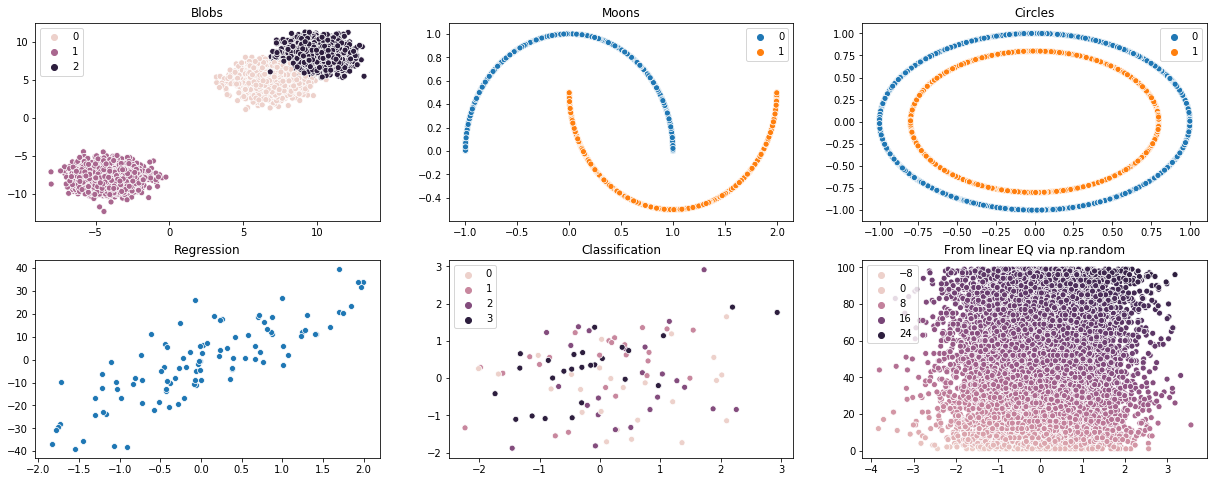

In [7]:
n = 6
n_c = 3
n_r = n//n_c if n % n_c == 0 else n//n_c + 1
plt.figure(figsize=(n_c*7, n_r*4))

binz=100
samp_n=10000
## 1. 
X, y = datasets.make_blobs(n_samples=samp_n, n_features=2)
plt.subplot(n_r, n_c, 1)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y )  
plt.title('Blobs')

## 2.  
X, y = datasets.make_moons(n_samples=samp_n )
plt.subplot(n_r, n_c, 2)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y )  
plt.title('Moons')

## 3.  
X, y = datasets.make_circles(n_samples=samp_n )
plt.subplot(n_r, n_c, 3)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y )  
plt.title('Circles')


## 4.  
X,y = datasets.make_regression( n_features=1, noise=10)
plt.subplot(n_r, n_c, 4)
sns.scatterplot(x=X[:,0], y=y )  
plt.title('Regression')

## 5.  
X, y = datasets.make_classification(n_informative=6,n_classes=4)
plt.subplot(n_r, n_c, 5)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y ) 
plt.title('Classification');


## 6.   from a linear eq using np
np.random.seed(9999)
x1 = np.random.randn( samp_n )
x2 = np.random.randint( 1, 100, samp_n )
y = x1 + 2*np.sqrt(x2) 
plt.subplot(n_r, n_c, 6)
sns.scatterplot(x=x1, y=x2, hue=y ) 
plt.title('From linear EQ via np.random');

### Probability Distributions

In [8]:
from scipy import stats
# or from np.random 

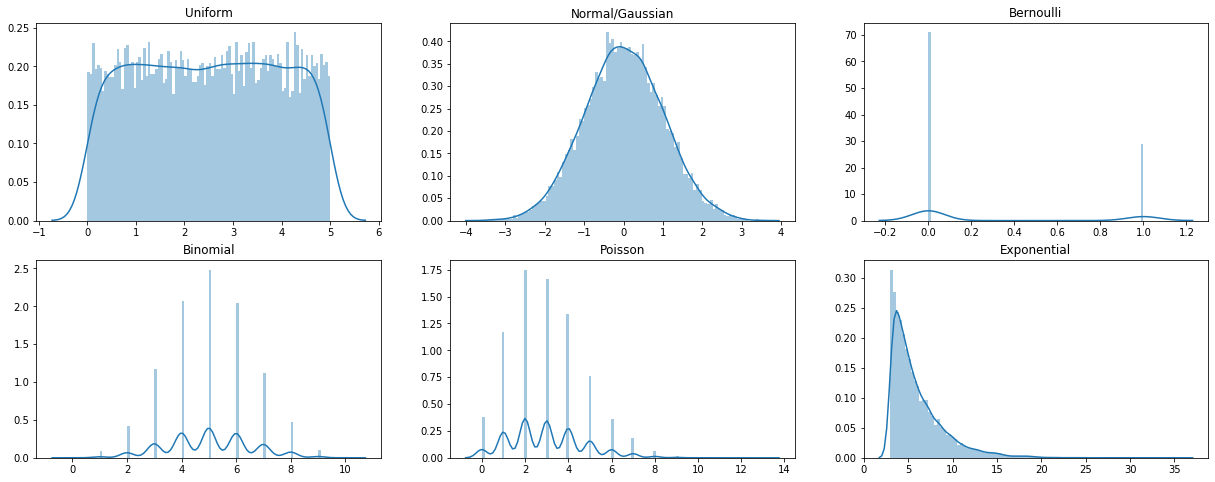

In [9]:
n = 6
n_c = 3
n_r = n//n_c if n % n_c == 0 else n//n_c + 1
plt.figure(figsize=(n_c*7, n_r*4))

binz=100
samp_n=10000
## 1. uniform a=0, b=5 
d = stats.uniform.rvs(size=samp_n, loc=0, scale=5)
plt.subplot(n_r, n_c, 1)
sns.distplot( d, bins=binz  ); 
plt.title('Uniform')

## 2. standard normal N(0,1)
d = stats.norm.rvs(size=samp_n, loc=0, scale=1)
plt.subplot(n_r, n_c, 2)
sns.distplot( d, bins=binz  ); 
plt.title('Normal/Gaussian')

## 3. bernoulli p=0.3
d = stats.bernoulli.rvs(size=samp_n, p=0.3)
plt.subplot(n_r, n_c, 3)
sns.distplot( d, bins=binz  ); 
plt.title('Bernoulli')


## 4. binomial p=0.5, n=10
d = stats.binom.rvs(size=samp_n, p=0.5, n=10)
plt.subplot(n_r, n_c, 4)
sns.distplot( d, bins=binz  ); 
plt.title('Binomial')

## 5. poisson mu=3
d = stats.poisson.rvs(size=samp_n, mu=3)
plt.subplot(n_r, n_c, 5)
sns.distplot( d, bins=binz  );
plt.title('Poisson')

## 6. exponential, 1/lambda=3
d = stats.expon.rvs(size=samp_n, loc=3, scale=3)
plt.subplot(n_r, n_c, 6)
sns.distplot( d, bins=binz  );
plt.title('Exponential');


### Preprocessing & Transformers

In [36]:
from sklearn.preprocessing import StandardScaler, PowerTransformer, FunctionTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.linear_model import LinearRegression


In [11]:
features_col = ['CRIM','Age', 'INDUS']
target_col = 'RAD'

[array([ 4, 25]), array([ 5, 36])]


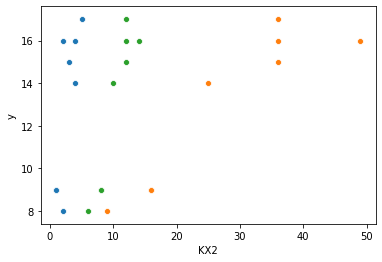

In [12]:
df = pd.DataFrame( columns=['X1', 'X2', 'y'], data=[
    [1, 16, 9],
    [4, 36, 16],
    [1, 16, 9],
    [2, 9, 8],
    [3, 36, 15],
    [2, 49, 16],
    [4, 25, 14],
    [5, 36, 17],
])# y = X1 + 2*sqrt(X2)

## do kern on x2 to make linear b/c we already know the relationship
df['KX2'] = 2 * np.sqrt( df.X2 )
df['y2'] = df.y **2


train = df.iloc[:6]
test = df.iloc[6:]

trainer = list(train[['X1', 'X2']].values)
tester = list( test[['X1','X2']].values )

print(tester)

sns.scatterplot(x=df.X1, y=df.y)
sns.scatterplot(x=df.X2, y=df.y)
sns.scatterplot(x=df.KX2, y=df.y);
# sns.scatterplot(x=df.X1, y=df.KX2); 

In [13]:
class KnownKernTransform(BaseEstimator, TransformerMixin):
    def __init__(self, feature_index):
        self.feature_index=feature_index
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X_ = X.copy()
        X_[self.feature_index] = 2 * np.sqrt( X_[self.feature_index] )
        return X_

    
print("-- 1. bila transform ")
pipe1 = Pipeline([    
    ('linear', LinearRegression() ),
])
_ = pipe1.fit( trainer, list(train.y) )
pipe1.predict( tester)

print("\n-- 2. with transform ")
pipe2 = Pipeline([    
    ('kernit', KnownKernTransform(1)), 
    ('linear', LinearRegression() ),
])
_ = pipe2.fit( trainer, list(train.y) )
pipe2.predict( tester )

print( "\n--- inputs: ", tester )
test[['y','y2']]

-- 1. bila transform 


array([13.72113586, 16.93334467])


-- 2. with transform 


array([16.77973209, 15.98100754])


--- inputs:  [array([ 4, 25]), array([ 5, 36])]


,y,y2
6,14,196
7,17,289


In [14]:
## Transforming Targets >>> TransformedTargetRegressor 
## 2. class approach 
class KnownYTransform(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, target):
        return self
    
    def transform(self,target):
        targ_ = target.copy()
        targ_ = np.sqrt(targ_)
        return targ_
    
    def inverse_transform(self, target):
        targ_ = target.copy()
        targ_ = targ_**2
        return targ_
    
## 1. function method 
def target_y_transform(target):
    targ_ = target.copy()
    targ_ = np.sqrt(targ_)
    return targ_

def inverse_target_y_transform(target):
    targ_ = target.copy()
    targ_ = targ_**2
    return targ_

print("-- 1. bila transform on y2")
_ = pipe2.fit( trainer, list(train.y2) )
p = pipe2.predict( tester )
p
np.sqrt(p)

print("\n-- 2. with function transform on y2") 
model = TransformedTargetRegressor(regressor=pipe2,
                                  func=target_y_transform,
                                  inverse_func=inverse_target_y_transform,
                                  check_inverse=False)
_ = model.fit( trainer , list(train.y2) )
p = model.predict( tester )
p
np.sqrt(p)


print("\n-- 3. with class transform on y2")
model = TransformedTargetRegressor(regressor=pipe2,
                                   transformer=KnownYTransform(),
                                  check_inverse=False)
_ = model.fit( trainer, list(train.y2) )
p = model.predict( tester )
p
np.sqrt(p)



print( "\n--- inputs: ", tester )
test[['y','y2']]

-- 1. bila transform on y2


array([274.03028538, 255.59362762])

array([16.55386014, 15.98729582])


-- 2. with function transform on y2


array([281.55940904, 255.39260184])

array([16.77973209, 15.98100754])


-- 3. with class transform on y2


array([281.55940904, 255.39260184])

array([16.77973209, 15.98100754])


--- inputs:  [array([ 4, 25]), array([ 5, 36])]


,y,y2
6,14,196
7,17,289


In [15]:
#model.get_params()

### Generators

In [16]:
def fibonacci(n=10):
    res = []
    def fib(f0, f1):
        res.append( (f0 + f1 ) )
    
    for x in range(n):
        if x == 0 or x == 1:
            res.append(x)
        if len(res) >= 2:
            fib(res[-2], res[-1])
    return res


def fibonacci2(n=10):
    def fib2():
        f0, f1 = 0, 1
        while True:
            yield f0
            f0, f1 = f1, f0+f1

    for i, r in enumerate(fib2()):
        print(f'{r}', end=" ")
        if i == nf:
            break
        
        
        
nf = 13

print("\n==== Method 1 ")
fibonacci(nf)
print("\n==== Method 2 ")
fibonacci2(nf)



==== Method 1 


[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233]


==== Method 2 
0 1 1 2 3 5 8 13 21 34 55 89 144 233 

## Bringing it home

**Book reviews**
- Feature extraction 
- Sentiment analysis 
- Persona clusters
- 


In [171]:
import json
from nltk import tokenize, FreqDist
from wordcloud import WordCloud

from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.decomposition import PCA, TruncatedSVD

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier 


from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, plot_precision_recall_curve

# ref: data @ https://github.com/KeithGalli/sklearn/blob/master/data/category 
json_file = 'Clothing_small.json'

In [18]:
## TODO: deal large files for now mmeee
def json_file_reader(fname):
    with open( fname, 'r') as fd:
        for line in fd:
            yield json.loads( line )

In [190]:
class ExtracTextTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, txt_col, lbl_col=None):
        self.text = txt_col
        self.target = lbl_col
        
    def fit(self,X, y=None):
        return self 
    
    def transform(self, X, y=None): ##TODO: colz @ init
        colz = ['comment', 'headline', 'lex_complexity', 'avg_word_len', 
                'avg_sentence_len', 'i_counts', 'axn_ratio', 'adv_ratio', 
                'sentiment_cscore', 'sentiment_label' ]        
        if self.target:
            colz.append('rating')
            
        df_records = []
        
        for src in X:
            record = []
            # a. extract review col from json + headline 
            X_ = src.get(self.text, '') 
            record.append(X_)
            # TODO: place label 
            record.append( src.get('summary', '')  )
            
            print(f">>> ETL: X_ = {X_}")
            
            cft = MyCorporaText( X_) ## @ref 00_utils and 01_redux 
            print(f">>> ETL: corpora = {cft}")
            
            # b. get lexical complexity
            record.append( cft.lexical_diversity )
            # c. avg word length + sentence length 
            record.append( cft.mean_word_length )
            record.append( cft.mean_sentence_length )            
            # d. get pos stats 
            #'i_counts': 0,'axn_ratio': 0,'adv_ratio':0,          
            pstats = cft.pos_tag_stats()
            record.append( pstats.get('i_counts', 0) )
            record.append( pstats.get('axn_ratio', 0) )
            record.append( pstats.get('adv_ratio', 0) )
            # e. get sentiments score dict: {neg, neu, pos, compound}
            ss = cft.sentiment_score.get('compound', 0)
            record.append( ss ) 
            record.append( 'POS' if ss >=0.05 else 'NEG' if ss <=0.05 else 'NEU') 
            
            
            ## ditto if target
            if self.target:
                record.append( src.get(self.target, '') )
            
            print(f">>> ETL: record.fini = {record}")
            df_records.append( record )
        
        # return a dataframe 
        df_records = pd.DataFrame.from_records(df_records, columns=colz )
        
        return df_records
        


### 1. EDA

In [65]:
dframe = ExtracTextTransformer('reviewText', 'overall').transform( json_file_reader( json_file) )
dframe.head()

,comment,headline,lex_complexity,avg_word_len,avg_sentence_len,i_counts,axn_ratio,adv_ratio,sentiment_cscore,sentiment_label,rating
0,They appear more oxidized and darker in the pi...,Breathtakingly gorgeous.,1.000000,5.333333,65.0,0.000000,0.000000,0.046875,0.9505,POS,5.0
1,"I wear either a size 4 or 6, and these fit me ...","Cute, cute",1.000000,4.333333,62.5,0.500000,0.000000,0.201149,0.9223,POS,5.0
2,"I am very disappointed with the fit, the fabri...",If you are looking for a breathable fabric thi...,0.896552,6.615385,110.0,1.000000,0.025641,0.099497,0.1548,POS,2.0
3,"Perfect fit. True to size. I wear 9, 9 1/2 pur...","tired feet, achy feet, try these cute comfy sa...",0.923077,5.000000,37.0,0.200000,0.020000,0.011111,0.9752,POS,5.0
4,"What a great deal. This watch is lovely, it e...",Beautiful watch!,1.000000,5.736842,63.0,0.333333,0.000000,0.058081,0.8236,POS,5.0


In [27]:
dframe.describe(include='all')

,comment,headline,lex_complexity,avg_word_len,avg_sentence_len,i_counts,axn_ratio,adv_ratio,sentiment_cscore,sentiment_label,rating
count,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.000000
unique,1000,925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,Love it..i always get compliments when i wear it,Five Stars,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POS,NaN
freq,1,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,902,NaN
mean,NaN,NaN,0.892972,5.051779,74.359609,0.375355,0.027481,0.077476,0.680395,NaN,4.247000
std,NaN,NaN,0.085595,0.571159,42.787971,0.385844,0.032123,0.056457,0.401788,NaN,1.080351
min,NaN,NaN,0.568182,3.478261,4.000000,0.000000,0.000000,0.000000,-0.941700,NaN,1.000000
25%,NaN,NaN,0.838710,4.708333,47.362500,0.000000,0.000000,0.041667,0.599400,NaN,4.000000
50%,NaN,NaN,0.902439,5.032258,62.500000,0.333333,0.019864,0.070792,0.851250,NaN,5.000000
75%,NaN,NaN,0.958333,5.375694,88.933333,0.600000,0.043478,0.103775,0.934900,NaN,5.000000


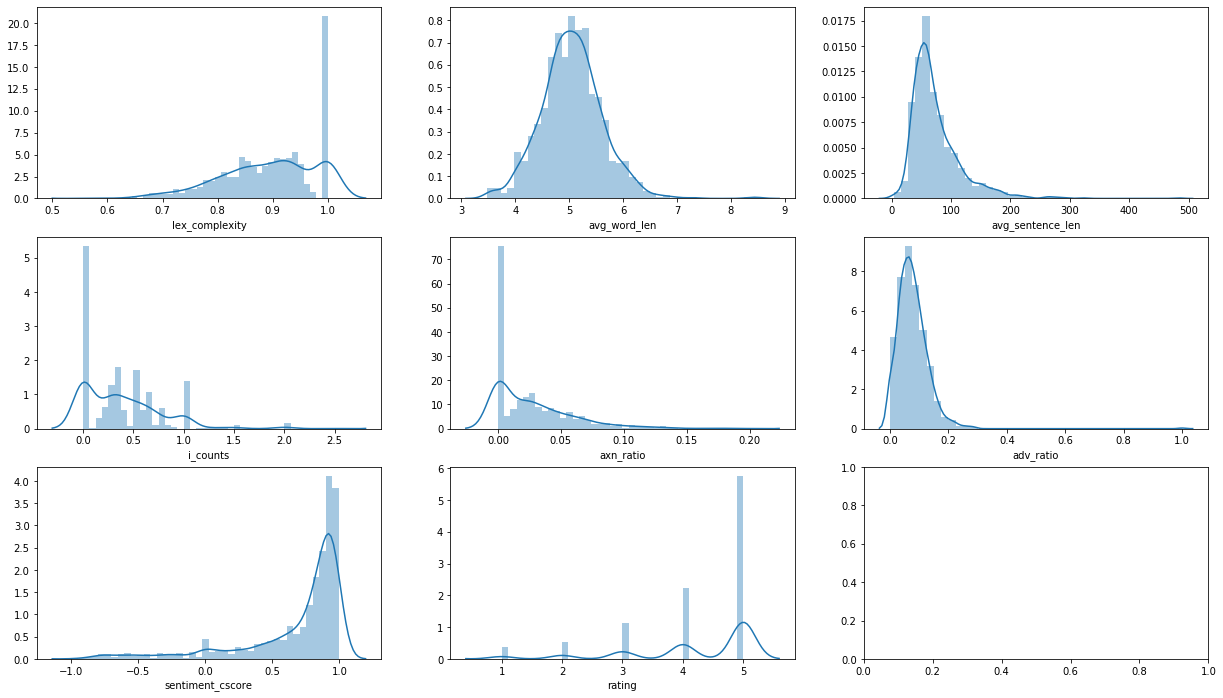

In [55]:
vcolz = [*dframe.columns[2:-2], dframe.columns[-1] ]
n = len(vcolz )
n_c = 3
n_r = n//n_c if n%n_c == 0 else n//n_c + 1


fig, axs = plt.subplots(n_r, n_c, figsize=(n_c*7, n_r*4), sharey=False, squeeze=False) 
n_bins=40
for i, c in enumerate(vcolz):
    ax = axs[(i//n_c), (i%n_c)]
    sns.distplot( dframe[c], bins=n_bins, ax=ax); 
#     ax.set_title(f'{c} dist'); 

plt.show();


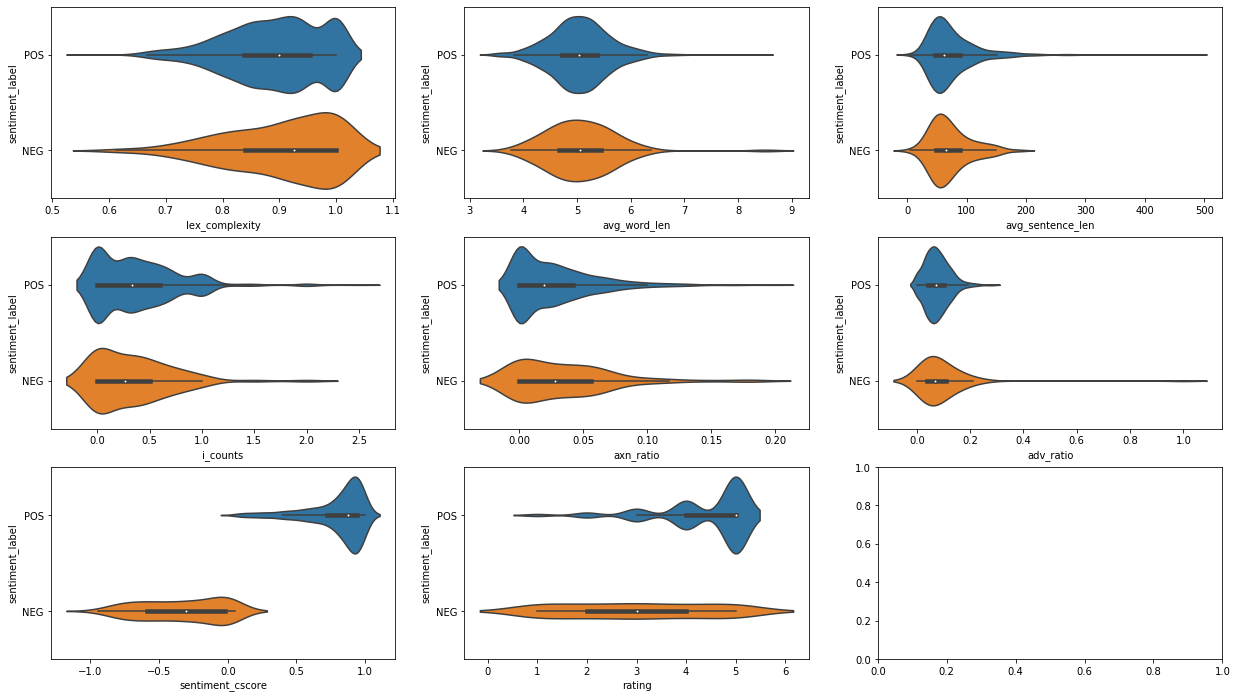

In [29]:
vcolz = [*dframe.columns[2:-2], dframe.columns[-1] ]
n = len(vcolz ) 
n_c = 3
n_r = n//n_c if n%n_c == 0 else n//n_c + 1


fig, axs = plt.subplots(n_r, n_c, figsize=(n_c*7, n_r*4), sharey=False, squeeze=False) 
for i, c in enumerate(vcolz):
    ax = axs[(i//n_c), (i%n_c)]
    sns.violinplot(x=c, 
                   y='sentiment_label', 
                   heu='sentiment_label', 
                   data=dframe, ax=ax); 
    #ax.set_title(f'{c} dist'); 


plt.show();

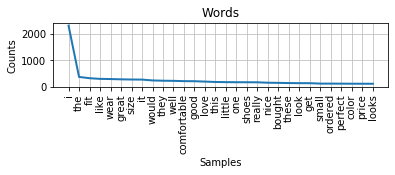

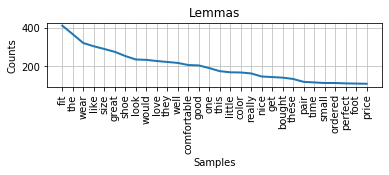

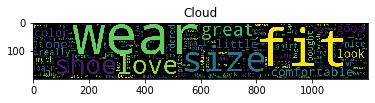

In [30]:

## Word stats 
corp  = MyCorporaText( "\n".join(dframe.comment.values), remove_numbers=True )
plt.subplot(3, 1, 1, title='Words')
corp.freq_dist.plot(30); 


plt.subplot(3, 1, 2, title='Lemmas')
FreqDist( corp.lemmas ).plot(30); 



plt.subplot(3, 1, 3, title='Cloud')
wc = WordCloud(width=1200).generate( " ".join(corp.lemmas) )
plt.imshow(wc);


In [147]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



In [162]:
# model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
# model.fit( dframe[ dframe.columns[2:-2] ].values )
# plot_dendrogram(model, truncate_mode='level', p=3)

number of estimated clusters : 6


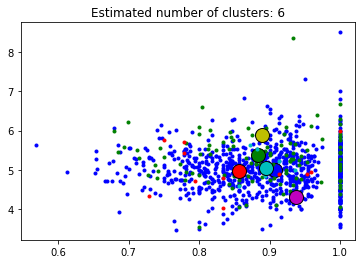

In [161]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle

# x_dat, _ = datasets.make_blobs(n_samples=10000, centers=[[1,1],[-1,-1],[1,-1]], cluster_std=0.6) 
x_dat = dframe[ dframe.columns[2:-2] ].values
#x_dat
bwidth = estimate_bandwidth(x_dat, quantile=0.2, n_samples=500 )
ms = MeanShift(bandwidth=bwidth, bin_seeding=True )
ms.fit(x_dat)

labelz = ms.labels_
cluster_centers = ms.cluster_centers_
labelz_u = np.unique( labelz )
n_clusters_ = len(labelz_u)

print("number of estimated clusters : %d" % n_clusters_)
# #############################################################################
# Plot result
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labelz == k
    cluster_center = cluster_centers[k]
    plt.plot(x_dat[my_members, 0], x_dat[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show();

In [31]:
# ref: https://www.slideshare.net/DavidRostcheck/nlp-and-personality-analysis

In [68]:
selected_features = ['lex_complexity', 'avg_word_len', 'avg_sentence_len', 
                     'i_counts','axn_ratio','adv_ratio', 'sentiment_cscore' ]
rescale_cols = ['avg_sentence_len',  'avg_word_len']
target_col = 'rating'
text_col = 'comment'
one_hots = ['headline', 'sentiment_label']

In [80]:
### --- A. ETL pipeline ---
etl_pipe = Pipeline([
    # 1. get data from json file as dataframe 
    ('fetch', ExtracTextTransformer('reviewText', 'overall') ),
    
    # 2. Do text.vector_encoding + scale some cols +bow headline
    ('featurize', ColumnTransformer([
        ('encoded', TfidfVectorizer(), text_col ), 
        ('headlined', OneHotEncoder(), one_hots ),
        ('selected', StandardScaler(), rescale_cols )
    ], remainder='passthrough'))
], verbose=True)


Xdata = etl_pipe.fit_transform(json_file_reader( json_file))


[Pipeline] ............. (step 1 of 2) Processing fetch, total=  21.2s
[Pipeline] ......... (step 2 of 2) Processing featurize, total=   0.0s


In [101]:
print( f"Shape: { Xdata.shape } {Xdata[0].shape}")  

#### --- B. Train Test & X, y split
X, y = Xdata[:, :-1], Xdata[:, -1].toarray().flatten()

print( f"Shape: { X.shape } {y.shape} \n{y[:6]}")  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

print("---- Train Test ---- ")
print( f"Shape: X_train: { X_train.shape }, X_test: { X_test.shape }, y_train: { y_train.shape }, y_test: { y_test.shape }")  

Shape: (1000, 5505) (1, 5505)
Shape: (1000, 5504) (1000,) 
[5. 5. 2. 5. 5. 5.]
---- Train Test ---- 
Shape: X_train: (700, 5504), X_test: (300, 5504), y_train: (700,), y_test: (300,)


In [105]:
# plt.subplot(1,2,1)
# sns.distplot(y, bins=100)
# plt.title('target (ratings) distribution ')

# plt.subplot(1,2,2)
# sns.distplot( np.log1p( np.exp( (y+abs(y.min()))/200 ) ), bins=100)
# plt.title('log(target) distribution ');

In [144]:
#### --- C. Model training pipelines ---
model_pipe = Pipeline([
    # 1. Dimensionality reduce b/c text and headline vectorized plus extra features with similar distributions
    # ('pca', PCA() ), # using TruncatedSVD b/c sparse
    ('tsvd', TruncatedSVD() ),
    # 2. classification model 
    ('logit', LogisticRegression(max_iter=10000, tol=0.1) )
], verbose=True)

In [145]:
#### --- D. Train ----- 
grid_paramz = {
#     'pca__n_components' : [7, 13, 15, 20, 30, 45, 100, 200 ],
    'tsvd__n_components' : [7, 13, 15, 20, 30, 45, 100, 200 ],
    'logit__C': np.logspace(-4, 4, 4), 
}

runner = GridSearchCV( model_pipe, grid_paramz, n_jobs=-1)
_ = runner.fit(X_train, y_train)

print(f"Best has score: { '{:.3f}'.format(runner.best_score_ ) }")
print( runner.best_score_)


[Pipeline] .............. (step 1 of 2) Processing tsvd, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing logit, total=   0.1s
Best has score: 0.611
0.6114285714285714


In [165]:
# df_res = pd.DataFrame( runner.cv_results_ )
# # df_res.head()

# bcol='param_tsvd__n_components'
# bscore='mean_test_score'

# ## pca/tsvd components
# plt.subplot(1,1,1)
# mod = TruncatedSVD()
# mod.fit(X_train)
# sns.lineplot( np.arange(1, mod.n_components+1), 
#               mod.explained_variance_ratio_ ,  
#              markers='+', linewidth=2)
# plt.axvline( runner.best_estimator_.named_steps['tsvd'].n_components, linestyle=':', label='n_comps chosen')
# plt.legend(prop=dict(size=12))
# ## best classifer results for each component 
# compoz = df_res.groupby(bcol).apply(
#         lambda x: x.nlargest(1, bscore)
#     )
# compoz.plot(x=bcol, y=bscore, yerr='std_test_score')

# plt.show();

In [166]:
#### --- E. Validate ----- 
#### -- gridsearchCV does TODO: combo 
# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(runner, X_train, y_train, cv=5)
# print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))




              precision    recall  f1-score   support

         1.0       0.44      0.24      0.31        17
         2.0       0.33      0.06      0.11        16
         3.0       0.20      0.09      0.12        34
         4.0       0.15      0.04      0.07        68
         5.0       0.63      0.96      0.76       165

    accuracy                           0.57       300
   macro avg       0.35      0.28      0.27       300
weighted avg       0.45      0.57      0.47       300



[[  4   1   4   2   6]
 [  2   1   2   2   9]
 [  2   1   3   9  19]
 [  1   0   4   3  60]
 [  0   0   2   4 159]]


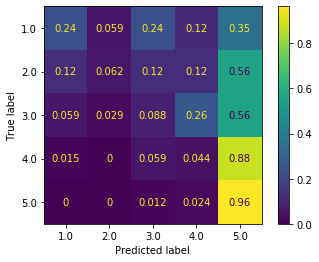

In [176]:
y_pred = runner.predict( X_test)
print( classification_report( y_test, y_pred ) )

print( "\n========\n")

print(confusion_matrix(y_test, y_pred, normalize=None))
plot_confusion_matrix(runner, X_test, y_test, normalize='true');

In [199]:
#### --- F. Use ----

texts = ['This is amazingly good!!', 'How awful!!', 'Yes it does what it should', 'That was okay', 'It is the job well', 'It fails at the job.']

msg_row = "{txt:<30s} : {px:.3f}".format

etl_pipe.verbose=False
for txt in texts:  
    etl_rec = etl_pipe.fit_transform( [{'reviewText': txt, 'summary':'', 'overall':0}, ] )
#     print( etl_rec )
    
    X, y = etl_rec[:, :-1], etl_rec[:, -1] #.toarray().flatten()
#     print( X , "\ny: ", y )
    px = -1 #"TODO: sparce matrix dimensions align" #runner.predict( X )
    print( msg_row(txt=txt, px=px))




This is amazingly good!!       : -1.000
How awful!!                    : -1.000
Yes it does what it should     : -1.000
That was okay                  : -1.000
It is the job well             : -1.000
It fails at the job.           : -1.000
